In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df_parodies = pd.read_pickle("BERT_scores/BERT_corona_parodies.pkl")
df_originals = pd.read_pickle("BERT_scores/BERT_matched_originals.pkl")

In [4]:
parodies_sent = df_parodies["BERT_sent_scores"].tolist()
parodies_sent_df = pd.DataFrame(parodies_sent)
parodies_sent_df["Tag"] = "Parodies"

originals_sent = df_originals["BERT_sent_scores"].tolist()
originals_sent_df = pd.DataFrame(originals_sent)
originals_sent_df["Tag"] = "Originals"

In [10]:
parodies_emot = df_parodies["BERT_emot_scores"].tolist()
parodies_emot_df = pd.DataFrame(parodies_emot)
parodies_emot_df["Tag"] = "Parodies"

originals_emot = df_originals["BERT_emot_scores"].tolist()
originals_emot_df = pd.DataFrame(originals_emot)
originals_emot_df["Tag"] = "Originals"


In [13]:
originals_emot_df.to_csv("originals_emotions.csv", index=False)

In [46]:
originals_emot_df

,others,joy,sadness,anger,surprise,disgust,fear,Tag
0,0.362759,0.003325,0.008810,0.013224,0.002706,0.605196,0.003980,Originals
1,0.955470,0.005049,0.003125,0.002191,0.001568,0.029520,0.003077,Originals
2,0.943443,0.045894,0.003415,0.000713,0.002279,0.002137,0.002118,Originals
3,0.968973,0.009937,0.000719,0.006110,0.003516,0.008256,0.002488,Originals
4,0.262165,0.024311,0.696216,0.003118,0.003686,0.007278,0.003226,Originals
...,...,...,...,...,...,...,...,...
159,0.018774,0.006065,0.967534,0.001739,0.001437,0.002451,0.002000,Originals
160,0.925046,0.012918,0.001261,0.002985,0.029689,0.010050,0.018051,Originals
161,0.152755,0.002992,0.001761,0.264676,0.002995,0.570954,0.003867,Originals
162,0.233192,0.009551,0.002346,0.695672,0.003586,0.051720,0.003932,Originals


In [10]:
shapiro_wilk = pd.DataFrame(columns=["Sentiment", "p-value"])
sent_labels = ["POS_or", "POS_par", "NEG_or", "NEG_par", "NEU_or", "NEU_par"]
shapiro_wilk["Sentiment"] = sent_labels
shapiro_wilk

,Sentiment,p-value
0,POS_or,NaN
1,POS_par,NaN
2,NEG_or,NaN
3,NEG_par,NaN
4,NEU_or,NaN
5,NEU_par,NaN


In [6]:
shapiro_wilk = pd.DataFrame(columns=["Emotion", "p-value"])
sent_labels = ["others_or", "others_par", "joy_or", "joy_par", "sadness_or", "sadness_par", "anger_or", "anger_par", "surprise_or", "surprise_par", "disgust_or", "disgust_par", "fear_or", "fear_par"]
shapiro_wilk["Emotion"] = sent_labels
shapiro_wilk

,Emotion,p-value
0,others_or,NaN
1,others_par,NaN
2,joy_or,NaN
3,joy_par,NaN
4,sadness_or,NaN
5,sadness_par,NaN
6,anger_or,NaN
7,anger_par,NaN
8,surprise_or,NaN
9,surprise_par,NaN


In [16]:
values = []
labels_sent = ["POS", "NEG", "NEU"]
labels_emot = ["others", "joy",	"sadness", "anger",	"surprise",	"disgust", "fear"]
for label in labels_emot:
    values.append(stats.shapiro(originals_emot_df[label]).pvalue)
    values.append(stats.shapiro(parodies_emot_df[label]).pvalue)


In [17]:
shapiro_wilk["p-value"] = values
shapiro_wilk

,Sentiment,p-value
0,POS_or,0.0
1,POS_par,0.0
2,NEG_or,0.0
3,NEG_par,0.0
4,NEU_or,0.0
5,NEU_par,0.0


In [51]:
shapiro_wilk.to_csv("BERT_emot_shapiro_wilk.csv", index = False)

In [52]:
s = pd.read_csv("BERT_emot_shapiro_wilk.csv")
s

,Emotion,p-value
0,others_or,1.270751e-15
1,others_par,4.058788e-15
2,joy_or,2.749209e-24
3,joy_par,2.700396e-27
4,sadness_or,1.614527e-22
5,sadness_par,9.840638e-26
6,anger_or,1.089359e-26
7,anger_par,2.372840e-25
8,surprise_or,2.099691e-20
9,surprise_par,1.750773e-23


In [27]:
t_test = pd.DataFrame(columns=["Emotion", "p-value"])
sent_labels = ["others", "joy",	"sadness", "anger",	"surprise",	"disgust", "fear"]
t_test["Emotion"] = sent_labels
t_test

,Emotion,p-value
0,others,NaN
1,joy,NaN
2,sadness,NaN
3,anger,NaN
4,surprise,NaN
5,disgust,NaN
6,fear,NaN


In [28]:
values = []
labels_sent = ["POS", "NEG", "NEU"]
labels_emot = ["others", "joy",	"sadness", "anger",	"surprise",	"disgust", "fear"]
for label in labels_emot:
   values.append(stats.ttest_rel(originals_emot_df[label], parodies_emot_df[label]).pvalue)
    

In [29]:
t_test["p-value"] = values
t_test

,Emotion,p-value
0,others,4.564734e-02
1,joy,1.292834e-02
2,sadness,1.194570e-02
3,anger,1.117355e-01
4,surprise,5.207690e-07
5,disgust,6.179159e-01
6,fear,4.349195e-05


In [30]:
t_test.to_csv("BERT_emot_t_test.csv", index = False)

In [31]:
t = pd.read_csv("BERT_emot_t_test.csv")

In [43]:
wilcoxon = pd.DataFrame(columns=["Emotion", "p-value"])
sent_labels = ["others", "joy",	"sadness", "anger",	"surprise",	"disgust", "fear"]
wilcoxon["Emotion"] = sent_labels
wilcoxon

,Emotion,p-value
0,others,NaN
1,joy,NaN
2,sadness,NaN
3,anger,NaN
4,surprise,NaN
5,disgust,NaN
6,fear,NaN


In [44]:
values = []
labels_sent = ["POS", "NEG", "NEU"]
labels_emot = ["others", "joy",	"sadness", "anger",	"surprise",	"disgust", "fear"]
for label in labels_emot:
   values.append(stats.wilcoxon(originals_emot_df[label], parodies_emot_df[label]).pvalue)

In [45]:
wilcoxon["p-value"] = values
wilcoxon

,Emotion,p-value
0,others,7.014031e-02
1,joy,4.680753e-07
2,sadness,1.803164e-01
3,anger,2.763425e-01
4,surprise,1.305004e-09
5,disgust,1.425920e-01
6,fear,9.775097e-07


In [46]:
wilcoxon.to_csv("BERT_emot_wilcoxon.csv", index = False)

In [47]:
w = pd.read_csv("BERT_emot_wilcoxon.csv")
w

,Emotion,p-value
0,others,7.014031e-02
1,joy,4.680753e-07
2,sadness,1.803164e-01
3,anger,2.763425e-01
4,surprise,1.305004e-09
5,disgust,1.425920e-01
6,fear,9.775097e-07


In [38]:
stats.wilcoxon(originals_sent_df["POS"], parodies_sent_df["POS"]).pvalue

1.427280128901858e-17

In [13]:
parodies_sent = df_parodies["BERT_emot_scores"].tolist()
parodies_sent_df = pd.DataFrame(parodies_sent)
parodies_sent_df["Tag"] = "Parodies"

originals_sent = df_originals["BERT_emot_scores"].tolist()
originals_sent_df = pd.DataFrame(originals_sent)
originals_sent_df["Tag"] = "Originals"

In [4]:
parodies_sent_df

,others,joy,sadness,anger,surprise,disgust,fear,Tag
0,0.009335,0.002344,0.112025,0.001891,0.002307,0.003624,0.868474,Parodies
1,0.964250,0.004363,0.001702,0.002872,0.001621,0.020545,0.004648,Parodies
2,0.351991,0.007845,0.002848,0.005807,0.005145,0.009938,0.616426,Parodies
3,0.972187,0.006696,0.001360,0.001047,0.003282,0.009687,0.005741,Parodies
4,0.862238,0.005138,0.009495,0.003353,0.002180,0.058250,0.059346,Parodies
...,...,...,...,...,...,...,...,...
159,0.973392,0.010552,0.000839,0.003293,0.001634,0.008700,0.001590,Parodies
160,0.029740,0.002082,0.002795,0.002504,0.001989,0.007596,0.953293,Parodies
161,0.977215,0.008529,0.001445,0.001037,0.001865,0.004782,0.005127,Parodies
162,0.099327,0.004988,0.168841,0.002821,0.004667,0.006839,0.712517,Parodies


In [21]:
conct_df = parodies_sent_df.append(originals_sent_df, ignore_index=True)
conct_df

/tmp/ipykernel_24048/3403912006.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  conct_df = parodies_sent_df.append(originals_sent_df, ignore_index=True)


,NEG,NEU,POS,Tag
0,0.929229,0.067025,0.003746,Parodies
1,0.966105,0.030519,0.003376,Parodies
2,0.894640,0.101016,0.004344,Parodies
3,0.002879,0.734434,0.262688,Parodies
4,0.051303,0.913015,0.035682,Parodies
...,...,...,...,...
323,0.045146,0.637406,0.317448,Originals
324,0.002666,0.468244,0.529091,Originals
325,0.110856,0.860563,0.028580,Originals
326,0.210597,0.701742,0.087661,Originals


In [15]:
df0 = pd.melt(conct_df, value_vars=["others", "joy", "sadness", "anger", "surprise", "disgust",	"fear"], id_vars='Tag', var_name="Emotions", value_name="Mean")

In [22]:
df0 = pd.melt(conct_df, value_vars=["NEG", "NEU", "POS"], id_vars='Tag', var_name="Emotions", value_name="Mean")

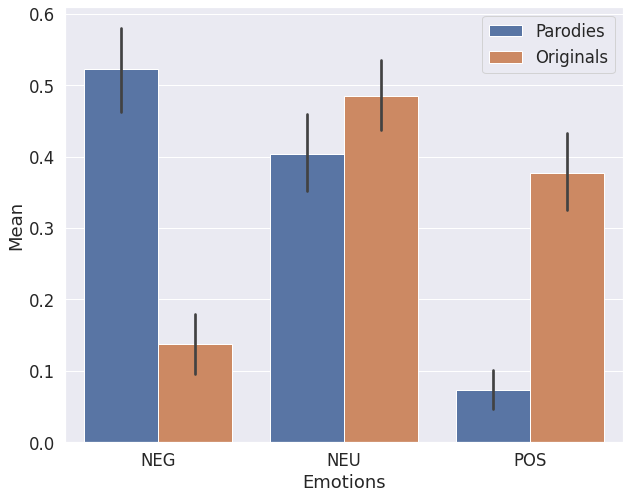

In [24]:
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x='Emotions', y='Mean', hue='Tag', ci = 95, ax = ax, data=df0)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[2:], labels=labels[2:])
#fig.savefig("Emotions_mean_ci95.png")

In [4]:
texts = df["prepared_BERT"].tolist()
cleaned = [clean_text(text) for text in texts]
df["cleaned_text"] = cleaned
df 

,raw_text,prepared_BERT,BERT_sent_scores,BERT_emot_scores,cleaned_text
0,[Verse 1]\nWhen I grew up my family was very v...,When I grew up my family was very very poor Bu...,"{'NEG': 0.0718955397605896, 'NEU': 0.901947319...","{'others': 0.6933397650718689, 'joy': 0.005929...",when i grew up my family was very very poor bu...
1,\n[Chorus]\nI remember love in the city\nLivin...,I remember love in the city Living for the lat...,"{'NEG': 0.004150602966547012, 'NEU': 0.1218134...","{'others': 0.9238672256469727, 'joy': 0.008093...",i remember love in the city living for the lat...
2,"[Verse 1]\nSomewhere in China, a bat took a le...","Somewhere in China, a bat took a leak Pissed a...","{'NEG': 0.9624901413917542, 'NEU': 0.034668304...","{'others': 0.9016407132148743, 'joy': 0.005615...",somewhere in china a bat took a leak pissed al...
3,[Verse 1]\nSocial life has come and passed\nQu...,Social life has come and passed Quarantine is ...,"{'NEG': 0.929228663444519, 'NEU': 0.0670251473...","{'others': 0.009335007518529892, 'joy': 0.0023...",social life has come and passed quarantine is ...
4,[Verse 1]\nAs I walk this wicked world\nSearch...,As I walk this wicked world Searching for ligh...,"{'NEG': 0.05112225189805031, 'NEU': 0.87072134...","{'others': 0.8907967209815979, 'joy': 0.007419...",as i walk this wicked world searching for ligh...
...,...,...,...,...,...
346,[Verse 1]\nYou're broken down and tired\nOf li...,You're broken down and tired Of living life on...,"{'NEG': 0.004515166860073805, 'NEU': 0.4139312...","{'others': 0.9266726970672607, 'joy': 0.064531...",you re broken down and tired of living life on...
347,"[Chorus]\nQuarantine, gotta quarantine\nQuaran...","Quarantine, gotta quarantine Quarantine, gotta...","{'NEG': 0.4116404056549072, 'NEU': 0.568241417...","{'others': 0.0993264839053154, 'joy': 0.004988...",quarantine gotta quarantine quarantine gotta q...
348,[Verse 1]\nThere comes a time when we heed a c...,There comes a time when we heed a certain call...,"{'NEG': 0.0012957989238202572, 'NEU': 0.035596...","{'others': 0.8936835527420044, 'joy': 0.035033...",there comes a time when we heed a certain call...
349,[Intro: spoken]\n\n[Verse 1]\nOnce upon a time...,Once upon a time in the city of Wuhan Virus ex...,"{'NEG': 0.8351588845252991, 'NEU': 0.159016519...","{'others': 0.950640857219696, 'joy': 0.0125106...",once upon a time in the city of wuhan virus ex...


In [9]:
stops = open("stops.txt", "r")
stops = stops.read().split()
stops

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 '

In [14]:
def collect_lemmas(text: str, nlp) -> List[str]:
    """
    Lemmatizes text using spaCy pipeline.
    Args:
        text (str): A text to extract lemmas from.
        nlp: A spaCy pipeline.
    Returns:
        List[str]: A list with lemmas.
    """

    lemmas = []

    doc = nlp(text)

    for token in doc:
        lemmas.append(token.lemma_)

    return lemmas


In [15]:
def rm_stops(text: List[str], stopwords: List[str]) -> List[str]:
    """
    Removes stopwords from tokenized/lemmatized text.
    Args:
        text (List[str]): A list with tokens/lemmas.
        stopwords (List[str]): A list of stopwords.
    Returns:
       List[str]: A list with tokens/lemmas without stopwords.
    """

    no_stopwords = []

    for word in text:
        if word not in stopwords:
            no_stopwords.append(word)

    return no_stopwords

In [17]:
nlp = spacy.load("en_core_web_lg")

lemmas = [collect_lemmas(text, nlp) for text in cleaned]
no_stops = [rm_stops(text, stops) for text in lemmas]


In [19]:
df["lemmas"] = no_stops
df

,raw_text,prepared_BERT,BERT_sent_scores,BERT_emot_scores,cleaned_text,lemmas
0,[Verse 1]\nWhen I grew up my family was very v...,When I grew up my family was very very poor Bu...,"{'NEG': 0.0718955397605896, 'NEU': 0.901947319...","{'others': 0.6933397650718689, 'joy': 0.005929...",when i grew up my family was very very poor bu...,"[I, grow, family, poor, scrap, somehow, keep, ..."
1,\n[Chorus]\nI remember love in the city\nLivin...,I remember love in the city Living for the lat...,"{'NEG': 0.004150602966547012, 'NEU': 0.1218134...","{'others': 0.9238672256469727, 'joy': 0.008093...",i remember love in the city living for the lat...,"[I, remember, love, city, live, late, night, l..."
2,"[Verse 1]\nSomewhere in China, a bat took a le...","Somewhere in China, a bat took a leak Pissed a...","{'NEG': 0.9624901413917542, 'NEU': 0.034668304...","{'others': 0.9016407132148743, 'joy': 0.005615...",somewhere in china a bat took a leak pissed al...,"[somewhere, china, bat, take, leak, piss, unco..."
3,[Verse 1]\nSocial life has come and passed\nQu...,Social life has come and passed Quarantine is ...,"{'NEG': 0.929228663444519, 'NEU': 0.0670251473...","{'others': 0.009335007518529892, 'joy': 0.0023...",social life has come and passed quarantine is ...,"[social, life, come, pass, quarantine, re, sta..."
4,[Verse 1]\nAs I walk this wicked world\nSearch...,As I walk this wicked world Searching for ligh...,"{'NEG': 0.05112225189805031, 'NEU': 0.87072134...","{'others': 0.8907967209815979, 'joy': 0.007419...",as i walk this wicked world searching for ligh...,"[I, walk, wicked, world, search, light, darkne..."
...,...,...,...,...,...,...
346,[Verse 1]\nYou're broken down and tired\nOf li...,You're broken down and tired Of living life on...,"{'NEG': 0.004515166860073805, 'NEU': 0.4139312...","{'others': 0.9266726970672607, 'joy': 0.064531...",you re broken down and tired of living life on...,"[re, break, tired, live, life, merry, go, roun..."
347,"[Chorus]\nQuarantine, gotta quarantine\nQuaran...","Quarantine, gotta quarantine Quarantine, gotta...","{'NEG': 0.4116404056549072, 'NEU': 0.568241417...","{'others': 0.0993264839053154, 'joy': 0.004988...",quarantine gotta quarantine quarantine gotta q...,"[quarantine, get, quarantine, quarantine, get,..."
348,[Verse 1]\nThere comes a time when we heed a c...,There comes a time when we heed a certain call...,"{'NEG': 0.0012957989238202572, 'NEU': 0.035596...","{'others': 0.8936835527420044, 'joy': 0.035033...",there comes a time when we heed a certain call...,"[come, time, heed, certain, call, world, must,..."
349,[Intro: spoken]\n\n[Verse 1]\nOnce upon a time...,Once upon a time in the city of Wuhan Virus ex...,"{'NEG': 0.8351588845252991, 'NEU': 0.159016519...","{'others': 0.950640857219696, 'joy': 0.0125106...",once upon a time in the city of wuhan virus ex...,"[upon, time, city, wuhan, virus, expansion, be..."


In [20]:
df = df.loc[df["lemmas"] != ""]

In [21]:
df

,raw_text,prepared_BERT,BERT_sent_scores,BERT_emot_scores,cleaned_text,lemmas
0,[Verse 1]\nWhen I grew up my family was very v...,When I grew up my family was very very poor Bu...,"{'NEG': 0.0718955397605896, 'NEU': 0.901947319...","{'others': 0.6933397650718689, 'joy': 0.005929...",when i grew up my family was very very poor bu...,"[I, grow, family, poor, scrap, somehow, keep, ..."
1,\n[Chorus]\nI remember love in the city\nLivin...,I remember love in the city Living for the lat...,"{'NEG': 0.004150602966547012, 'NEU': 0.1218134...","{'others': 0.9238672256469727, 'joy': 0.008093...",i remember love in the city living for the lat...,"[I, remember, love, city, live, late, night, l..."
2,"[Verse 1]\nSomewhere in China, a bat took a le...","Somewhere in China, a bat took a leak Pissed a...","{'NEG': 0.9624901413917542, 'NEU': 0.034668304...","{'others': 0.9016407132148743, 'joy': 0.005615...",somewhere in china a bat took a leak pissed al...,"[somewhere, china, bat, take, leak, piss, unco..."
3,[Verse 1]\nSocial life has come and passed\nQu...,Social life has come and passed Quarantine is ...,"{'NEG': 0.929228663444519, 'NEU': 0.0670251473...","{'others': 0.009335007518529892, 'joy': 0.0023...",social life has come and passed quarantine is ...,"[social, life, come, pass, quarantine, re, sta..."
4,[Verse 1]\nAs I walk this wicked world\nSearch...,As I walk this wicked world Searching for ligh...,"{'NEG': 0.05112225189805031, 'NEU': 0.87072134...","{'others': 0.8907967209815979, 'joy': 0.007419...",as i walk this wicked world searching for ligh...,"[I, walk, wicked, world, search, light, darkne..."
...,...,...,...,...,...,...
346,[Verse 1]\nYou're broken down and tired\nOf li...,You're broken down and tired Of living life on...,"{'NEG': 0.004515166860073805, 'NEU': 0.4139312...","{'others': 0.9266726970672607, 'joy': 0.064531...",you re broken down and tired of living life on...,"[re, break, tired, live, life, merry, go, roun..."
347,"[Chorus]\nQuarantine, gotta quarantine\nQuaran...","Quarantine, gotta quarantine Quarantine, gotta...","{'NEG': 0.4116404056549072, 'NEU': 0.568241417...","{'others': 0.0993264839053154, 'joy': 0.004988...",quarantine gotta quarantine quarantine gotta q...,"[quarantine, get, quarantine, quarantine, get,..."
348,[Verse 1]\nThere comes a time when we heed a c...,There comes a time when we heed a certain call...,"{'NEG': 0.0012957989238202572, 'NEU': 0.035596...","{'others': 0.8936835527420044, 'joy': 0.035033...",there comes a time when we heed a certain call...,"[come, time, heed, certain, call, world, must,..."
349,[Intro: spoken]\n\n[Verse 1]\nOnce upon a time...,Once upon a time in the city of Wuhan Virus ex...,"{'NEG': 0.8351588845252991, 'NEU': 0.159016519...","{'others': 0.950640857219696, 'joy': 0.0125106...",once upon a time in the city of wuhan virus ex...,"[upon, time, city, wuhan, virus, expansion, be..."
